In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/poojakameswariappalla/Downloads/spam.tsv',sep = '\t')

In [5]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
df.isna().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [75]:
df.columns

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [7]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [8]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
df['label'].value_counts()/len(df)

label
ham     0.865937
spam    0.134063
Name: count, dtype: float64

In [12]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [15]:
ham.shape

(4825, 4)

In [14]:
spam.shape

(747, 4)

In [18]:
ham = ham.sample(spam.shape[0])

In [19]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [21]:
ham

,label,message,length,punct
4147,ham,I cant wait for cornwall. Hope tonight isnt ...,157,4
5327,ham,Wishing you a wonderful week.,29,1
4148,ham,Pls help me tell sura that i'm expecting a bat...,139,3
5236,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,12
1570,ham,I dont have that much image in class.,37,1
...,...,...,...,...
3033,ham,Jokin only lar... :-) depends on which phone m...,69,9
2026,ham,"Yes obviously, but you are the eggs-pert and t...",74,3
1181,ham,I'm in chennai velachery:),26,3
1428,ham,THING R GOOD THANX GOT EXAMS IN MARCH IVE DONE...,126,3


In [22]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [24]:
new_df = pd.concat([ham,spam],ignore_index = True)

In [26]:
new_df.shape

(1494, 4)

In [27]:
new_df

,label,message,length,punct
0,ham,I cant wait for cornwall. Hope tonight isnt ...,157,4
1,ham,Wishing you a wonderful week.,29,1
2,ham,Pls help me tell sura that i'm expecting a bat...,139,3
3,ham,Your opinion about me? 1. Over 2. Jada 3. Kusr...,136,12
4,ham,I dont have that much image in class.,37,1
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


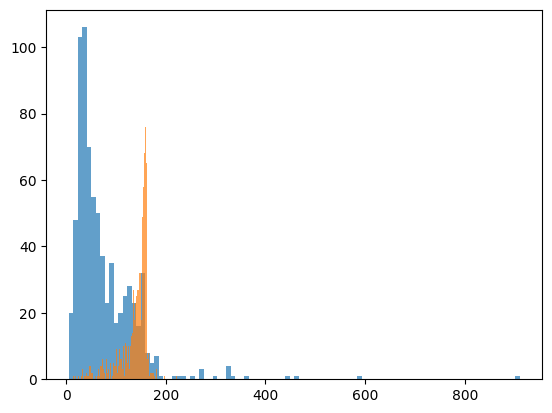

In [37]:
plt.hist(new_df[new_df['label'] == 'ham']['length'],bins = 100, alpha = 0.7)
plt.hist(new_df[new_df['label'] == 'spam']['length'],bins = 100, alpha = 0.7)
plt.show()

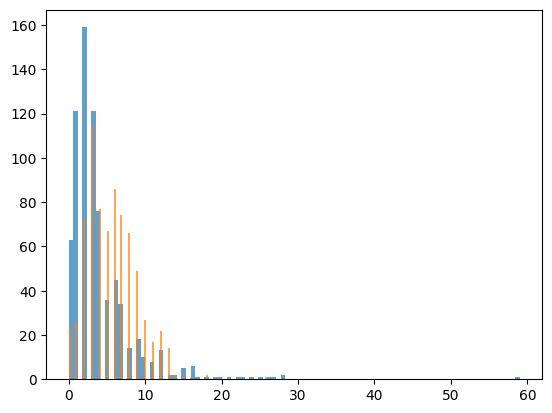

In [38]:
plt.hist(new_df[new_df['label'] == 'ham']['punct'],bins = 100, alpha = 0.7)
plt.hist(new_df[new_df['label'] == 'spam']['punct'],bins = 100, alpha = 0.7)
plt.show()

## RANDOM FOREST

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(new_df['message'],new_df['label'],test_size = 0.3, random_state = 0, shuffle = True)

In [43]:
X_train.shape

(1045,)

In [44]:
X_test.shape

(449,)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [53]:
classifier = Pipeline([('Tfidf',TfidfVectorizer()),('Randomforest',RandomForestClassifier(n_estimators = 10))])

In [54]:
classifier.fit(X_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('Randomforest', RandomForestClassifier(n_estimators=10))])

In [56]:
y_pred = classifier.predict(X_test)

In [59]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9287305122494433

In [60]:
confusion_matrix(y_test,y_pred)

array([[222,   5],
       [ 27, 195]])

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       227
        spam       0.97      0.88      0.92       222

    accuracy                           0.93       449
   macro avg       0.93      0.93      0.93       449
weighted avg       0.93      0.93      0.93       449



## SUPPORT VECTOR MACHINE

In [63]:
from sklearn.svm import SVC

In [65]:
svm = Pipeline([('tfidf',TfidfVectorizer()),('svm',SVC(C = 100, gamma = 'auto'))])

In [66]:
svm.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('svm', SVC(C=100, gamma='auto'))])

In [67]:
y_predict = svm.predict(X_test)

In [68]:
accuracy_score(y_test,y_predict)

0.955456570155902

In [69]:
confusion_matrix(y_test,y_predict)

array([[226,   1],
       [ 19, 203]])

In [70]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         ham       0.92      1.00      0.96       227
        spam       1.00      0.91      0.95       222

    accuracy                           0.96       449
   macro avg       0.96      0.96      0.96       449
weighted avg       0.96      0.96      0.96       449



In [71]:
s1 = ['Hello You are learning Natural language processing']
s2 = ['Hope you are doing good and learning new things']
s3 = ['Hello, Congratulations, you won a lottery of 1,000,000$, To claim call 44556 or press this link https:bbhjjkak//nklll']

In [73]:
print(classifier.predict(s1))
print(classifier.predict(s2))
print(classifier.predict(s3))

['ham']
['ham']
['spam']


In [74]:
print(svm.predict(s1))
print(svm.predict(s2))
print(svm.predict(s3))

['ham']
['ham']
['spam']
